## Introduction

This lesson will cover two essential Python types: strings and dictionaries.


## Strings

One place where the Python language really shines is in the manipulation of strings. This section will cover some of Python's built-in string methods and formatting operations.

Such string manipulation patterns come up often in the context of data science work.

### String syntax

You've already seen plenty of strings in examples during the previous lessons, but just to recap, strings in Python can be defined using either single or double quotations. They are functionally equivalent.

In [1]:
x = 'Pluto is a planet'
y = "Pluto is a planet"
x == y

True

Double quotes are convenient if your string contains a single quote character (e.g. representing an apostrophe).

Similarly, it's easy to create a string that contains double-quotes if you wrap it in single quotes:

In [2]:
print("Pluto's a planet!")
print('My dog is named "Pluto"')

Pluto's a planet!
My dog is named "Pluto"


If we try to put a single quote character inside a single-quoted string, Python gets confused:


In [3]:
'Pluto's a planet!'

SyntaxError: invalid syntax (Temp/ipykernel_512/1561186517.py, line 1)

We can fix this by "escaping" the single quote with a backslash.

In [5]:
'Pluto\'s a planet!'

"Pluto's a planet!"

The table below summarizes some important uses of the backslash character.

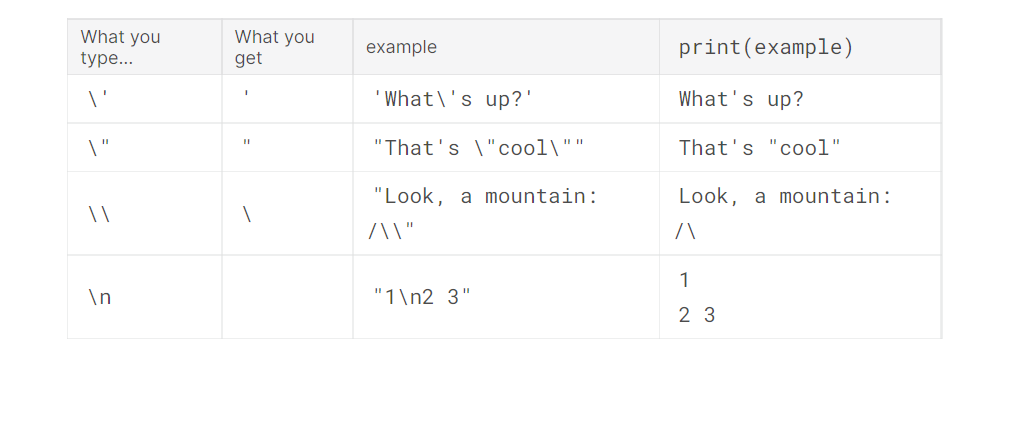


The last sequence, \n, represents the newline character. It causes Python to start a new line.

In [6]:
hello = "hello\nworld"
print(hello)

hello
world


In addition, Python's triple quote syntax for strings lets us include newlines literally (i.e. by just hitting 'Enter' on our keyboard, rather than using the special '\n' sequence). We've already seen this in the docstrings we use to document our functions, but we can use them anywhere we want to define a string.

In [7]:
triplequoted_hello = """hello
world"""
print(triplequoted_hello)
triplequoted_hello == hello

hello
world


True

The print() function automatically adds a newline character unless we specify a value for the keyword argument end other than the default value of '\n':

In [8]:
print("hello")
print("world")
print("hello", end='')
print("pluto", end='')

hello
world
hellopluto

### Strings are sequences

Strings can be thought of as sequences of characters. Almost everything we've seen that we can do to a list, we can also do to a string.

In [9]:
# Indexing
planet = 'Pluto'
planet[0]

'P'

In [10]:
# Slicing
planet[-3:]

'uto'

In [11]:
# How long is this string?
len(planet)

5

In [12]:
# Yes, we can even loop over them
[char+'! ' for char in planet]

['P! ', 'l! ', 'u! ', 't! ', 'o! ']

But a major way in which they differ from lists is that they are immutable. We can't modify them.

In [13]:
planet[0] = 'B'
# planet.append doesn't work either

TypeError: 'str' object does not support item assignment

### String methods

Like list, the type str has lots of very useful methods. I'll show just a few examples here.

In [14]:
# ALL CAPS
claim = "Pluto is a planet!"
claim.upper()

'PLUTO IS A PLANET!'

In [15]:
# all lowercase
claim.lower()

'pluto is a planet!'

In [16]:
# Searching for the first index of a substring
claim.index('plan')

11

In [17]:
claim.startswith(planet)

True

In [18]:
claim.endswith('dwarf planet')

False

### Going between strings and lists: .split() and .join()

str.split() turns a string into a list of smaller strings, breaking on whitespace by default. This is super useful for taking you from one big string to a list of words.

In [19]:
words = claim.split()
words

['Pluto', 'is', 'a', 'planet!']

Occasionally you'll want to split on something other than whitespace:

In [20]:
datestr = '1956-01-31'
year, month, day = datestr.split('-')

str.join() takes us in the other direction, sewing a list of strings up into one long string, using the string it was called on as a separator.

In [21]:
'/'.join([month, day, year])

'01/31/1956'

In [22]:
# Yes, we can put unicode characters right in our string literals :)
' 👏 '.join([word.upper() for word in words])

'PLUTO 👏 IS 👏 A 👏 PLANET!'

### Building strings with .format()

Python lets us concatenate strings with the + operator.


In [23]:
planet + ', we miss you.'

'Pluto, we miss you.'

If we want to throw in any non-string objects, we have to be careful to call str() on them first

In [24]:
position = 9
planet + ", you'll always be the " + position + "th planet to me."

TypeError: can only concatenate str (not "int") to str

In [25]:
planet + ", you'll always be the " + str(position) + "th planet to me."

"Pluto, you'll always be the 9th planet to me."

This is getting hard to read and annoying to type. str.format() to the rescue.

In [26]:
"{}, you'll always be the {}th planet to me.".format(planet, position)

"Pluto, you'll always be the 9th planet to me."

So much cleaner! We call .format() on a "format string", where the Python values we want to insert are represented with {} placeholders.

Notice how we didn't even have to call str() to convert position from an int. format() takes care of that for us.

If that was all that format() did, it would still be incredibly useful. But as it turns out, it can do a lot more. Here's just a taste:

In [27]:
pluto_mass = 1.303 * 10**22
earth_mass = 5.9722 * 10**24
population = 52910390
#         2 decimal points   3 decimal points, format as percent     separate with commas
"{} weighs about {:.2} kilograms ({:.3%} of Earth's mass). It is home to {:,} Plutonians.".format(
    planet, pluto_mass, pluto_mass / earth_mass, population,
)


"Pluto weighs about 1.3e+22 kilograms (0.218% of Earth's mass). It is home to 52,910,390 Plutonians."

In [28]:
# Referring to format() arguments by index, starting from 0
s = """Pluto's a {0}.
No, it's a {1}.
{0}!
{1}!""".format('planet', 'dwarf planet')
print(s)

Pluto's a planet.
No, it's a dwarf planet.
planet!
dwarf planet!


You could probably write a short book just on str.format, so I'll stop here, and point you to pyformat.info and the official docs for further reading.

## Dictionaries

Dictionaries are a built-in Python data structure for mapping keys to values.


In [7]:
numbers = {'one':1, 'two':2, 'three':3}

In [19]:
num1={'one':1}
num2={'two':2}
num1['two']=2
print(num1)

{'one': 1, 'two': 2}


In this case 'one', 'two', and 'three' are the keys, and 1, 2 and 3 are their corresponding values.

Values are accessed via square bracket syntax similar to indexing into lists and strings.

In [30]:
numbers['one']

1

We can use the same syntax to add another key, value pair

In [31]:
numbers['eleven'] = 11
numbers

{'one': 1, 'two': 2, 'three': 3, 'eleven': 11}

Or to change the value associated with an existing key

In [3]:
numbers['one'] = 'Pluto'
numbers

{'one': 'Pluto', 'two': 2, 'three': 3}

In [4]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planet_to_initial = {planet: planet[0] for planet in planets}
planet_to_initial

{'Mercury': 'M',
 'Venus': 'V',
 'Earth': 'E',
 'Mars': 'M',
 'Jupiter': 'J',
 'Saturn': 'S',
 'Uranus': 'U',
 'Neptune': 'N'}

The in operator tells us whether something is a key in the dictionary

In [5]:
'Saturn' in planet_to_initial

True

In [6]:
'Betelgeuse' in planet_to_initial

False

A for loop over a dictionary will loop over its keys

In [8]:
for k in numbers:
    print("{} = {}".format(k, numbers[k]))

one = 1
two = 2
three = 3


In [14]:
for k in numbers:
    print(" '{}' : {}".format(k, [numbers[k]]))

 'one' : [1]
 'two' : [2]
 'three' : [3]


We can access a collection of all the keys or all the values with dict.keys() and dict.values(), respectively.

In [8]:
# Get all the initials, sort them alphabetically, and put them in a space-separated string.
' '.join(sorted(planet_to_initial.values()))

'E J M M N S U V'

The very useful dict.items() method lets us iterate over the keys and values of a dictionary simultaneously. (In Python jargon, an item refers to a key, value pair)

In [9]:
for planet, initial in planet_to_initial.items():
    print("{} begins with \"{}\"".format(planet.rjust(10), initial))

   Mercury begins with "M"
     Venus begins with "V"
     Earth begins with "E"
      Mars begins with "M"
   Jupiter begins with "J"
    Saturn begins with "S"
    Uranus begins with "U"
   Neptune begins with "N"


To read a full inventory of dictionaries' methods, click the "output" button below to read the full help page, or check out the official online documentation.

In [10]:
help(dict)

Help on class dict in module builtins:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if the dictionary has the specified key, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self,

## Exercise

Keep in mind Python includes spaces (and punctuation) when counting string length.

In [11]:
print('it\'s ok')

it's ok


In [12]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [23]:
'12345'.isdigit()

True

In [24]:
len(str('12345'))

5

## 2.
A researcher has gathered thousands of news articles. But she wants to focus her attention on articles including a specific word. Complete the function below to help her filter her list of articles.

Your function should meet the following criteria:

Do not include documents where the keyword string shows up only as a part of a larger word. For example, if she were looking for the keyword “closed”, you would not include the string “enclosed.”
She does not want you to distinguish upper case from lower case letters. So the phrase “Closed the case.” would be included when the keyword is “closed”
Do not let periods or commas affect what is matched. “It is closed.” would be included when the keyword is “closed”. But you can assume there are no other types of punctuation.

In [ ]:
def word_search(doc_list, keyword):
    """
    Takes a list of documents (each document is a string) and a keyword. 
    Returns list of the index values into the original list for all documents 
    containing the keyword.

    Example:
    doc_list = ["The Learn Python Challenge Casino.", "They bought a car", "Casinoville"]
    >>> word_search(doc_list, 'casino')
    >>> [0]
    """
    return  

In [32]:
txt = "Hello, welcome to my world."

x = txt.find("Hello")

print(x)

print(type(x))

0
<class 'int'>


In [37]:
doc_list=['The Learn Python Challenge Casino', 'They bought a car, and a horse', 'Casinoville?']

for term in doc_list:
    print(term.find('ear'))
    
all([term.find('ear')==-1 for term in doc_list])

5
-1
-1


False

In [1]:
def word_search(doc_list, keyword):
    """
    Takes a list of documents (each document is a string) and a keyword. 
    Returns list of the index values into the original list for all documents 
    containing the keyword.

    Example:
    doc_list = ["The Learn Python Challenge Casino.", "They bought a car", "Casinoville"]
    >>> word_search(doc_list, 'casino')
    >>> [0]
    """    # list to hold the indices of matching documents
    indices = [] 
    # Iterate through the indices (i) and elements (doc) of documents
    for i, doc in enumerate(doc_list):
        # Split the string doc into a list of words (according to whitespace)
        tokens = doc.split()
        # Make a transformed list where we 'normalize' each word to facilitate matching.
        # Periods and commas are removed from the end of each word, and it's set to all lowercase.
        normalized = [token.rstrip('.,').lower() for token in tokens]
        # Is there a match? If so, update the list of matching indices.
        if keyword.lower() in normalized:
            indices.append(i)
    return indices

**普通的 for 循环**

In [2]:
i = 0
seq = ['one', 'two', 'three']
for element in seq:
     print(i, seq[i])
     i +=1

0 one
1 two
2 three


**for 循环使用 enumerate**

In [5]:
seq = ['one', 'two', 'three']
for i, element in enumerate(seq):
         print(i, element)

0 one
1 two
2 three


## 3.

Now the researcher wants to supply multiple keywords to search for. Complete the function below to help her.

(You're encouraged to use the word_search function you just wrote when implementing this function. Reusing code in this way makes your programs more robust and readable - and it saves typing!)

In [21]:
def multi_word_search(doc_list, keywords):
    """
    Takes list of documents (each document is a string) and a list of keywords.  
    Returns a dictionary where each key is a keyword, and the value is a list of indices
    (from doc_list) of the documents containing that keyword

    >>> doc_list = ["The Learn Python Challenge Casino.", "They bought a car and a casino", "Casinoville"]
    >>> keywords = ['casino', 'they']
    >>> multi_word_search(doc_list, keywords)
    {'casino': [0, 1], 'they': [1]}
    """
    # create a list of list
    indices = [] 
    for j in range(0,len(keywords)):
        indices.append([]) 
    
    result={} # create a new dict
    for k in range(0,len(keywords)):
        for i, doc in enumerate(doc_list):
            # Split the string doc into a list of words (according to whitespace)
            tokens = doc.split()
            # Make a transformed list where we 'normalize' each word to facilitate matching.
            # Periods and commas are removed from the end of each word, and it's set to all lowercase.
            normalized = [token.rstrip('.,').lower() for token in tokens]
            # Is there a match? If so, update the list of matching indices.
            if keywords[k].lower() in normalized:
                indices[k].append(i)
        result[keywords[k]]=indices[k]   # add a new term into the dictionary
                
    return result